In [10]:
import pandas as pd

df = pd.read_csv('consommation-quotidienne-brute-regionale.csv', sep=';')

df.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207796 entries, 0 to 2207795
Data columns (total 13 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   date_heure                          object 
 1   date                                object 
 2   heure                               object 
 3   code_insee_region                   int64  
 4   region                              object 
 5   consommation_brute_gaz_grtgaz       float64
 6   statut_grtgaz                       object 
 7   consommation_brute_gaz_terega       float64
 8   statut_terega                       object 
 9   consommation_brute_gaz_totale       float64
 10  consommation_brute_electricite_rte  int64  
 11  statut_rte                          object 
 12  consommation_brute_totale           float64
dtypes: float64(4), int64(2), object(7)
memory usage: 219.0+ MB


In [12]:
df_hdf = df[df['region'] == 'Hauts-de-France']
df_hdf = df_hdf[['date_heure', 'consommation_brute_electricite_rte']]

df_hdf

,date_heure,consommation_brute_electricite_rte
16,2013-01-21T11:00:00+01:00,8514
48,2013-01-21T19:00:00+01:00,8797
53,2013-01-21T20:00:00+01:00,8567
59,2013-01-21T21:00:00+01:00,8009
70,2013-01-21T23:00:00+01:00,7541
...,...,...
2207756,2023-06-23T07:30:00+02:00,5940
2207771,2023-06-23T10:00:00+02:00,5095
2207779,2023-06-23T11:30:00+02:00,4983
2207786,2023-06-23T12:30:00+02:00,5464


In [13]:
df_hdf['date_heure'] = df_hdf['date_heure'].str.replace(r'\+\d+:\d+$', '')
df_hdf['date_heure'] = pd.to_datetime(df_hdf['date_heure'], errors='coerce')
df_hdf


/tmp/ipykernel_49187/3606503552.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_hdf['date_heure'] = df_hdf['date_heure'].str.replace(r'\+\d+:\d+$', '')


,date_heure,consommation_brute_electricite_rte
16,2013-01-21 11:00:00,8514
48,2013-01-21 19:00:00,8797
53,2013-01-21 20:00:00,8567
59,2013-01-21 21:00:00,8009
70,2013-01-21 23:00:00,7541
...,...,...
2207756,2023-06-23 07:30:00,5940
2207771,2023-06-23 10:00:00,5095
2207779,2023-06-23 11:30:00,4983
2207786,2023-06-23 12:30:00,5464


In [14]:
df_hdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183983 entries, 16 to 2207789
Data columns (total 2 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   date_heure                          183983 non-null  datetime64[ns]
 1   consommation_brute_electricite_rte  183983 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 MB


In [15]:
# start_date = '2014-01-01'
# end_date = '2014-01-31'
# mask = (df_hdf['date_heure'] >= start_date) & (df_hdf['date_heure'] <= end_date)
# df_hdf = df_hdf.loc[mask]

In [16]:
df_hdf

,date_heure,consommation_brute_electricite_rte
16,2013-01-21 11:00:00,8514
48,2013-01-21 19:00:00,8797
53,2013-01-21 20:00:00,8567
59,2013-01-21 21:00:00,8009
70,2013-01-21 23:00:00,7541
...,...,...
2207756,2023-06-23 07:30:00,5940
2207771,2023-06-23 10:00:00,5095
2207779,2023-06-23 11:30:00,4983
2207786,2023-06-23 12:30:00,5464


<AxesSubplot: xlabel='date_heure'>

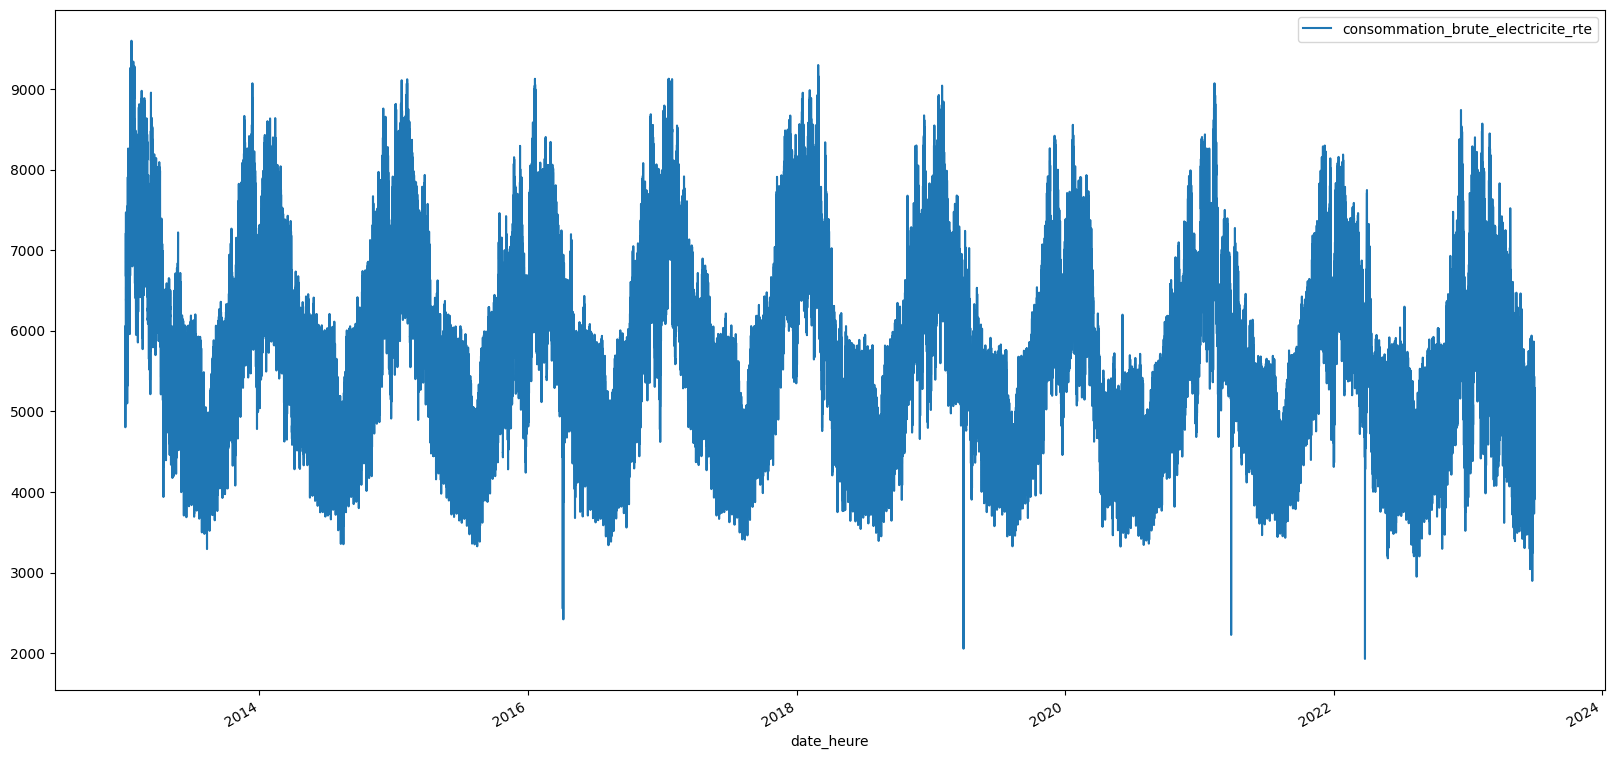

In [17]:
df_hdf.plot(x='date_heure', y='consommation_brute_electricite_rte', figsize=(20, 10))

In [18]:
# créer un nouveau dataframe 
df_hdf_day = df_hdf.copy()
# enregistre nouvell csv
df_hdf_day.to_csv('bronze.csv', index=False)